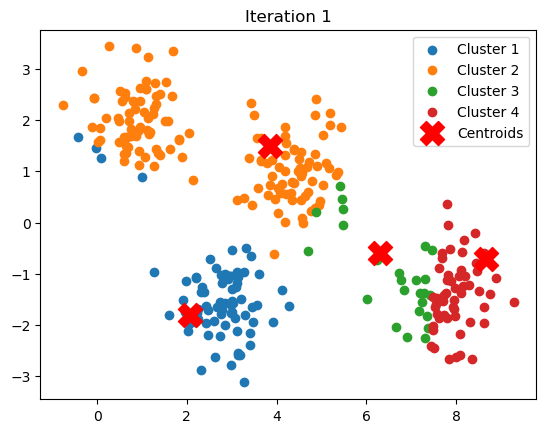

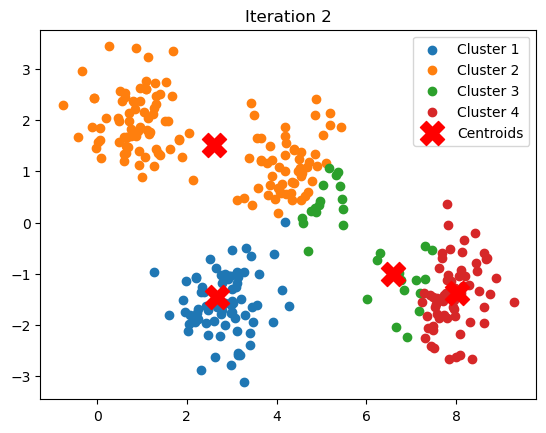

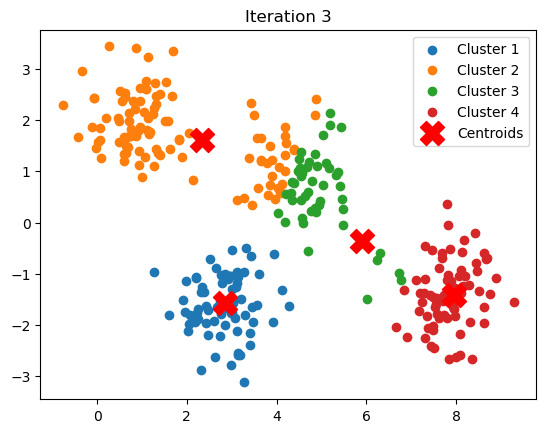

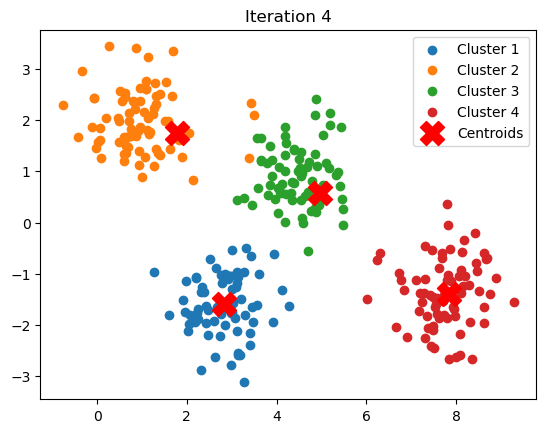

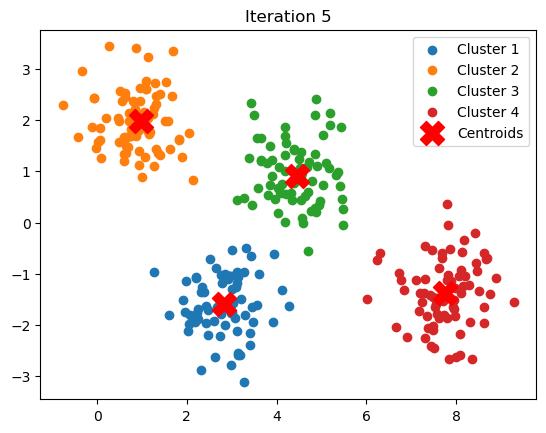

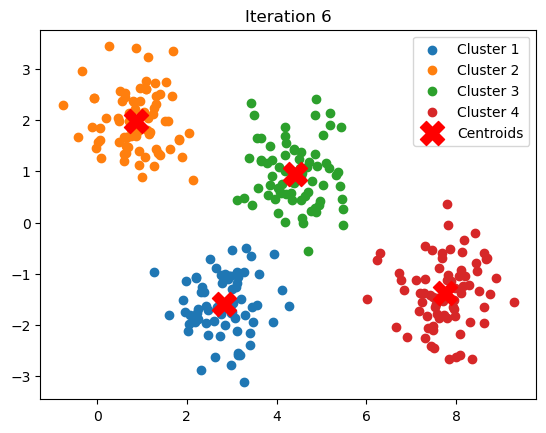

Algorithm converged after 6 iterations.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv('cdata.csv')
X = data[['x', 'y']].values  # 取出 X 和 Y 作為特徵

# 設定 K 值
K = 4
max_iters = 100
tol = 1e-4  # 收斂閾值

# 隨機選擇初始質心
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], K, replace=False)]

def compute_distance(X, centroids):
    """計算每個點到每個質心的距離"""
    return np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))

def update_centroids(X, labels, K):
    """更新每個類別的質心"""
    new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    return new_centroids

def plot_clusters(X, labels, centroids, iteration):
    """繪製聚類結果和質心"""
    plt.figure()
    for k in range(K):
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.show()

# 開始 K-means 聚類
for i in range(max_iters):
    # 計算每個點到質心的距離
    distances = compute_distance(X, centroids)
    
    # 分配類別標籤，選擇最接近的質心
    labels = np.argmin(distances, axis=1)
    
    # 繪製每次迭代的聚類結果
    plot_clusters(X, labels, centroids, i+1)
    
    # 計算新的質心
    new_centroids = update_centroids(X, labels, K)
    
    # 檢查質心的變化量是否小於閾值，判斷是否收斂
    if np.all(np.abs(new_centroids - centroids) < tol):
        print(f'Algorithm converged after {i+1} iterations.')
        break
    
    # 更新質心
    centroids = new_centroids

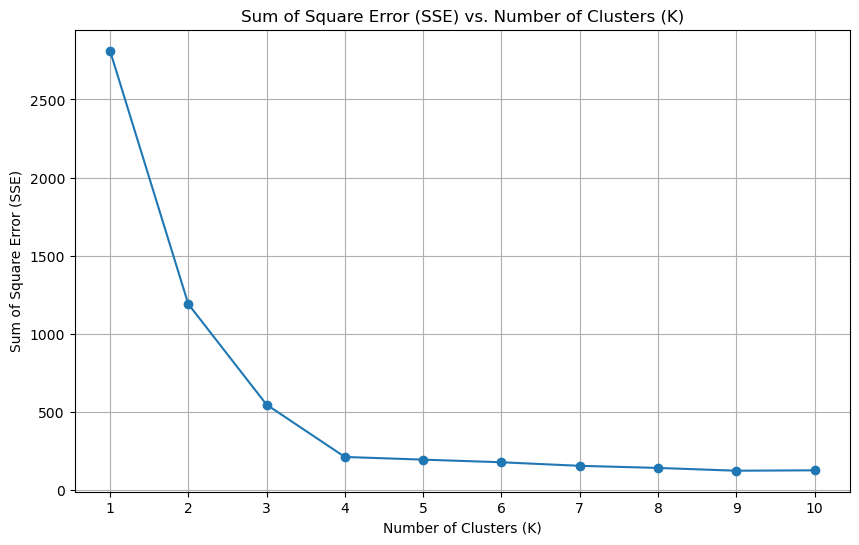

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 讀取數據集
data = pd.read_csv('cdata.csv')
X = data[['x', 'y']].values

# K-means++ 初始化
def initialize_centroids(X, K):
    n_samples, _ = X.shape
    centroids = np.zeros((K, X.shape[1]))
    centroids[0] = X[np.random.randint(0, n_samples)]  # 隨機選擇第一個質心
    for k in range(1, K):
        distances = np.min([np.linalg.norm(X - centroid, axis=1) for centroid in centroids[:k]], axis=0)
        probabilities = distances / distances.sum()  # 轉換為概率
        centroids[k] = X[np.random.choice(n_samples, p=probabilities)]
    return centroids

# K-means 演算法
def kmeans(X, K, max_iters=100):
    centroids = initialize_centroids(X, K)
    prev_centroids = np.zeros(centroids.shape)
    labels = np.zeros(X.shape[0])
    sse_values = []

    for _ in range(max_iters):
        # 分配每個點到最近的質心
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # 計算 SSE
        sse = np.sum((X - centroids[labels.astype(int)]) ** 2)
        sse_values.append(sse)

        # 更新質心
        prev_centroids = centroids.copy()
        for k in range(K):
            centroids[k] = X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k]

        # 檢查收斂
        if np.all(prev_centroids == centroids):
            break

    return centroids, labels, sse_values

# 繪製 SSE 隨 K 值變化的圖表
sse_list = []
K_values = range(1, 11)

for K in K_values:
    centroids, labels, sse_values = kmeans(X, K)
    sse_list.append(sse_values[-1])  # 取最後一個 SSE

plt.figure(figsize=(10, 6))
plt.plot(K_values, sse_list, marker='o')
plt.title('Sum of Square Error (SSE) vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Square Error (SSE)')
plt.grid()
plt.xticks(K_values)
plt.show()


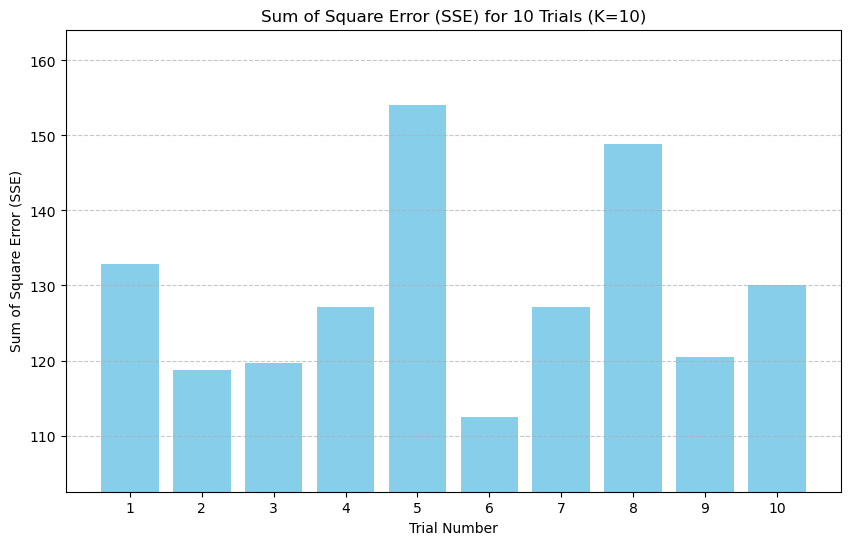

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 讀取數據集
data = pd.read_csv('cdata.csv')
X = data[['x', 'y']].values

# K-means 初始化
def initialize_centroids(X, K):
    n_samples, _ = X.shape
    return X[np.random.choice(n_samples, K, replace=False)]  # 隨機選擇 K 個質心

# K-means 演算法
def kmeans(X, K, max_iters=10):
    centroids = initialize_centroids(X, K)
    prev_centroids = np.zeros(centroids.shape)
    labels = np.zeros(X.shape[0])
    sse_values = []

    for iter_num in range(max_iters):
        # 分配每個點到最近的質心
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # 計算 SSE
        sse = np.sum((X - centroids[labels.astype(int)]) ** 2)
        sse_values.append(sse)

        # 更新質心
        prev_centroids = centroids.copy()
        for k in range(K):
            centroids[k] = X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k]

        # 檢查收斂
        if np.all(prev_centroids == centroids):
            break

    return sse_values

# 設定參數
K = 10  # 固定 K 值為 10
num_trials = 10  # 總共執行 10 次
all_sse_values = []

# 執行 10 次 K-means
for _ in range(num_trials):
    sse_values = kmeans(X, K)
    all_sse_values.append(sse_values[-1])  # 只記錄最終 SSE

# 繪製 SSE 隨執行次數變化的長條圖
plt.figure(figsize=(10, 6))
plt.bar(range(1, num_trials + 1), all_sse_values, color='skyblue')
plt.title(f'Sum of Square Error (SSE) for {num_trials} Trials (K={K})')
plt.xlabel('Trial Number')
plt.ylabel('Sum of Square Error (SSE)')
plt.xticks(range(1, num_trials + 1))
plt.ylim(min(all_sse_values) - 10, max(all_sse_values) + 10)  # 調整 y 軸範圍
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
